In [282]:
import numpy as np
from functools import *
from itertools import *
from operator import *
from random import *
from multiprocessing import Pool
from defs import *
import csv

import matplotlib
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle

https://www.wikiwand.com/en/Standard_deviation#/Rapid_calculation_methods


In [82]:
def processDataFile(filename):
    
    x = np.zeros(0)
    try:
        with open(filename, newline ='') as csvfile:
            reader = csv.reader(csvfile,delimiter=',')
            n = 0
            n_robot = 1
            data = []
            for row in reader:
                if n==0: print(row)
                if n !=0:
                    y = [float(f) for f in row]
                    data.append(y)
                n+=1
            x = np.array(data)
            print(x.shape)
    except:
        print("File not Found")

    return x

In [83]:
def plotRobotDown(data,x = None, dolegend=False):
    totalbot = int(data[-1,1])

    n_of_p = np.unique(data[:,2]).size
    
    if None == x: x=ps
    
    #x = [0.0, 0.5, 1.0, 1.5, 2.0, 2.25, 2.5, 3.0]
    
    for n_robot in range(0,totalbot):
        start = n_robot*n_of_p
        stop = start+n_of_p
        #x = data[start:stop,2]
        #x = [0.6,1   ,1.2,1.6,1.96,2.58,3    ,4]
        #x=list(range(0,8))
        y1 = data[start:stop,3]
        std1 = data[start:stop,4]
        y2 = data[start:stop,5]
        std2 = data[start:stop,6]
        num_bot = int(data[start,1])

        #plt.plot(x,y1,'b-')
        plt.errorbar(x,y2,yerr = std2, fmt='-',label = f'{num_bot}')

    plt.title('Robot Down time percentage vs AI Condfidence Interval')
    plt.xlabel(r'AI Condfidence Interval ($\sigma$)')
    plt.ylabel('Fleet Down time (%)')
    if dolegend: plt.legend()
    plt.show()

In [84]:
def plotHumanDown(data, x=None, dolegend=False ):
    totalbot = int(fulldata[-1,1])
    
    n_of_p = np.unique(data[:,2]).size
    
    #x = [0.0, 0.5, 1.0, 1.5, 2.0, 2.25, 2.5, 3.0]
    
    if None == x: x=ps

    #x = data[start:stop,2]
    #x = [0.6,1   ,1.2,1.6,1.96,2.58,3    ,4]
    #x=list(range(0,8))
    
    for n_robot in range(0,totalbot):
        start = n_robot*n_of_p
        stop = start+n_of_p

        y1 = data[start:stop,3]
        std1 = data[start:stop,4]
        y2 = data[start:stop,5]
        std2 = data[start:stop,6]
        num_bot = int(data[start,1])

        plt.errorbar(x,y1,yerr = std1,label = f'{num_bot}')
    #plt.plot(x,y2,label = f'{num_bot}')#,'g-')

    plt.title('Human Down time percentage vs AI Condfidence Interval')
    plt.xlabel(r'AI Condfidence Interval ($\sigma$)')
    plt.ylabel('Human Down time (%)')
    if dolegend: plt.legend()
    plt.show()

In [85]:
def plotThroughput(data, x=None, dolegend=False):
    totalbot = int(fulldata[-1,1])
    
    n_of_p = np.unique(data[:,2]).size
    
    if None == x: x=ps
    
    #x = [0.0, 0.5, 1.0, 1.5, 2.0, 2.25, 2.5, 3.0]
    
    #x = data[start:stop,2]
    #x = [0.6,1   ,1.2,1.6,1.96,2.58,3    ,4]
    #x=list(range(0,8))
    
    time = 30*24*60
    for n_robot in range(0,totalbot):
        start = n_robot*n_of_p
        stop = start+n_of_p
        y1 = data[start:stop,9]/time
        std1 = data[start:stop,10]/time
        num_bot = int(data[start,1])
        #plt.plot(x,y1,label = f'{num_bot}')
        plt.errorbar(x,y1,yerr = std1,label = f'{num_bot}')
    #plt.plot(x,y2,label = f'{num_bot}')#,'g-')
    plt.title('Throughput')
    plt.xlabel(r'AI Condfidence Interval ($\sigma$)')
    plt.ylabel('Grasps per minute')
    if dolegend: plt.legend()
    plt.show()

In [165]:
def plotSeqThroughpout(nbot,data,x=None):
    #ps = [0.5,0.68,0.8,0.9,0.95,0.99,0.997,0.99994]
    
    
    ps = np.unique(data[:,2])
    n_of_p = np.unique(ps).size

    if None == x: x=ps
    
    totalbot = int(data[-1,1])

    time = 30*24*60
    selected = []
    for i in range(0,n_of_p):
        n_robot = nbot[i]

        point = (n_robot-1)*n_of_p+i
        selected.append( data[point] )
        #print(data[point])

    nd = np.array(selected)
    plt.figure(1)
    for n_robot in range(0,totalbot):
        start = n_robot*n_of_p
        stop = start+n_of_p
        y1 = data[start:stop,9]/time
        std1 = data[start:stop,10]/time
        num_bot = int(data[start,1])
        #plt.plot(x,y1,label = f'{num_bot}')
        plt.errorbar(x,y1,yerr = std1,label = f'{num_bot}')
    plt.title('Throughput')
    plt.xlabel(r'AI Condfidence Interval ($\sigma$)')
    plt.ylabel('Grasps per minute')
    plt.plot(x,nd[:,9]/time,'kx-',label = 'Seq',linewidth=1.0)
    #plt.legend()


    plt.figure(2)
    plt.errorbar(x,nd[:,3],yerr=nd[:,4],label='Human')
    plt.errorbar(x,nd[:,5],yerr=nd[:,6],label='Robot')
    print(nd[:,5])
    plt.title('Down time')
    plt.xlabel(r'AI Condfidence Interval ($\sigma$)')
    plt.ylabel('Down time (%)')
    plt.legend()
    plt.show()

    

    plt.figure(3)
    plt.plot(ps,nbot)
    plt.title('Robots per Human')
    plt.xlabel(r'Success rate')
    plt.ylabel('N Robots / Human')
    plt.yticks(np.arange(0,totalbot+2,2))
    plt.show()

In [78]:
filename = 'merge56.csv'
x = [0.6,1,1.2,1.6,1.96,2.58,3 ,4]
nbot = [2  ,3,4  ,6  ,10  ,19  ,19,19]

filename = 'CDF2.csv'
x = [0.0, 0.5, 1.0, 1.5, 2.0, 2.25, 2.5, 3.0]
nbot = [2  ,3,4  ,7  ,14  ,14  ,14,14]

In [74]:
fulldata = processDataFile(filename)

['n_humans', 'n_robots', 'p_robot', 'mean Human Down', ' stdev human down', 'mean robot Down', ' stdev robot down', 'Success rate', 'stdev successrate', 'n_total', 'stdev n_total']
(112, 11)


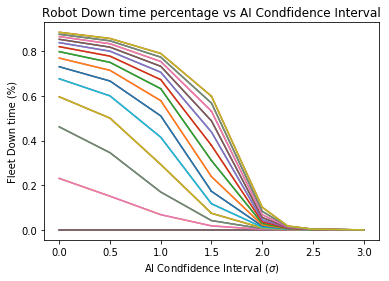

In [75]:
plotRobotDown(fulldata,x)

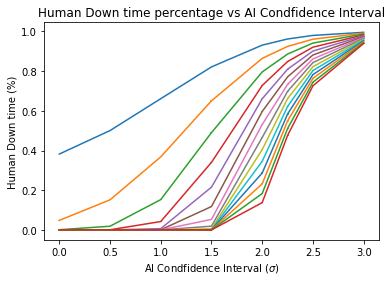

In [76]:
plotHumanDown(fulldata,x)

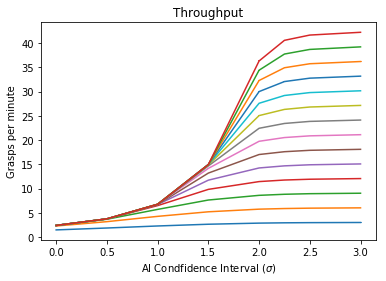

In [77]:
plotThroughput(fulldata,x)

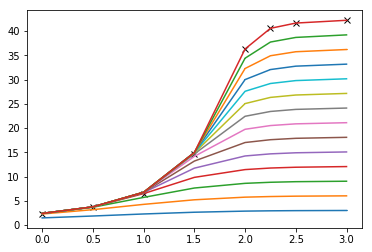

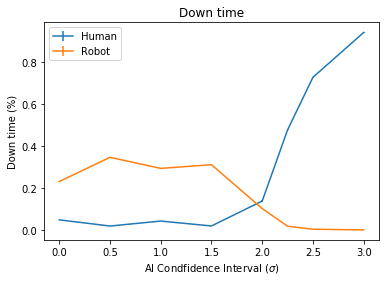

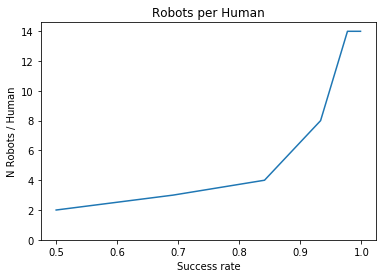

In [80]:
nbot = [2  ,3,4  ,8  ,14  ,14  ,14,14]
plotSeqThroughpout(nbot,fulldata,x)

In [87]:
filename = 'CDF3.csv'

In [88]:
fulldata = processDataFile(filename)

['n_humans', 'n_robots', 'p_robot', 'mean Human Down', ' stdev human down', 'mean robot Down', ' stdev robot down', 'Success rate', 'stdev successrate', 'n_total', 'stdev n_total']
(140, 11)


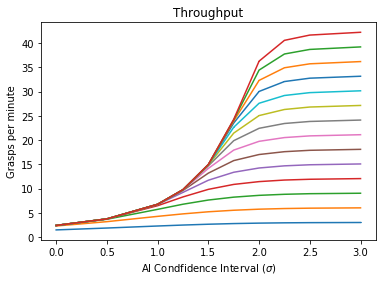

In [89]:
x = [0.0, 0.5, 1.0,1.25, 1.5,1.75, 2.0, 2.25, 2.5, 3.0]
plotThroughput(fulldata,x)

Optimized for throughput with minimum number of Robots

[  2.30139834e-01   3.46216872e-01   2.94450222e-01   3.55771219e-01
   3.09544970e-01   2.85650505e-01   1.02448283e-01   1.75224950e-02
   3.48538600e-03   1.33548000e-04]


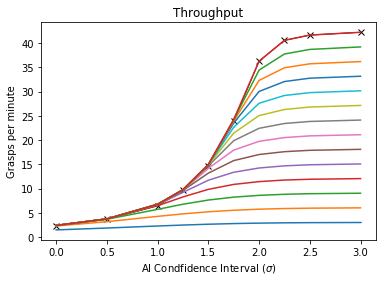

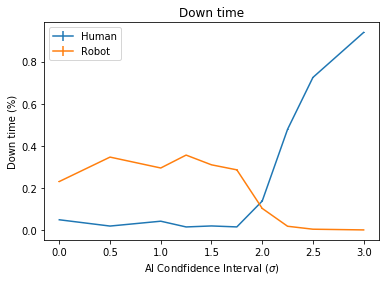

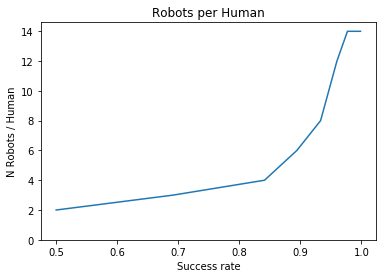

In [166]:
z = [0.5, 0.69, 0.84, 0.89, 0.93, 0.96, 0.977, 0.988, 0.994, 0.9986]
 
x    = [0.0, 0.5, 1.0, 1.25, 1.5, 1.75, 2.0, 2.25, 2.5, 3.0]
nbot = [2  ,3   , 4  , 6   , 8  , 12  , 14 , 14  , 14 , 14 ]
plotSeqThroughpout(nbot,fulldata,x)

By decreasing hte number of robots, you decrease robot down time for some trade off in Human down time. Here both at arround 15% downtime

[  2.30139834e-01   1.50857079e-01   1.68671039e-01   1.67464728e-01
   1.72972820e-01   1.46338717e-01   1.02448283e-01   1.75224950e-02
   3.48538600e-03   1.33548000e-04]


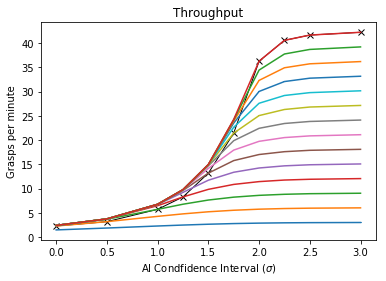

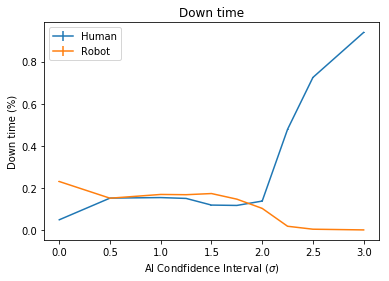

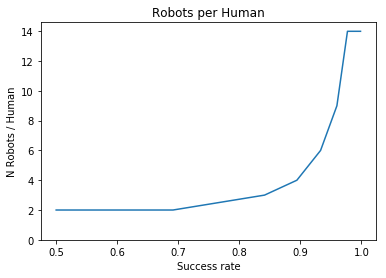

In [167]:
x    = [0.0, 0.5, 1.0, 1.25, 1.5, 1.75, 2.0, 2.25, 2.5, 3.0]
nbot = [2  ,2   , 3  , 4   , 6  , 9  , 14 , 14  , 14 , 14 ]
plotSeqThroughpout(nbot,fulldata,x)

Ran for 1% robot fleet down time. Leads to Significant human down time. between 40% and 100%

[ 0.          0.          0.          0.          0.          0.00735091
  0.00873253  0.00977764  0.00348539  0.00013355]


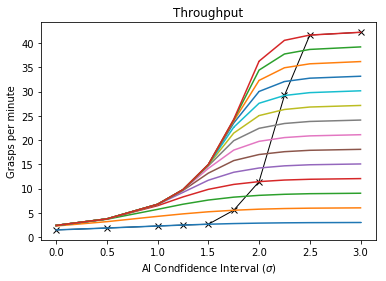

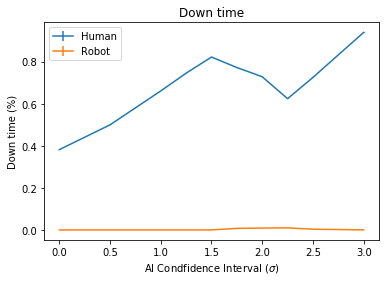

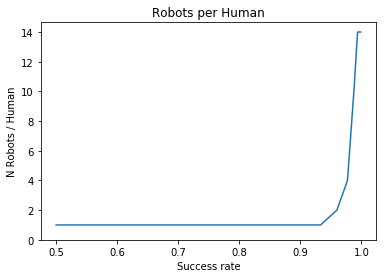

In [168]:
x    = [0.0, 0.5, 1.0, 1.25, 1.5, 1.75, 2.0, 2.25, 2.5, 3.0]
nbot = [1  ,1   , 1  , 1   , 1  , 2  , 4 , 10  , 14 , 14 ]
plotSeqThroughpout(nbot,fulldata,x)

[ 0.          0.          0.          0.          0.          0.00735091
  0.00549185  0.00699003  0.00348539  0.00013355]


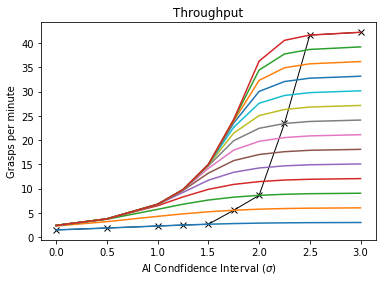

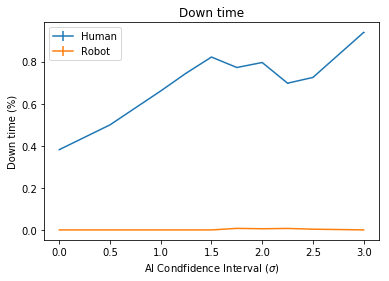

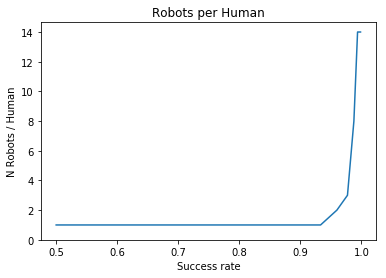

In [169]:
x    = [0.0, 0.5, 1.0, 1.25, 1.5, 1.75, 2.0, 2.25, 2.5, 3.0]
nbot = [1  ,1   , 1  , 1   , 1  , 2  , 3 , 8  , 14 , 14 ]
plotSeqThroughpout(nbot,fulldata,x)

In [170]:
filename = 'CDF1-24.csv'

In [171]:
fulldata = processDataFile(filename)

['n_humans', 'n_robots', 'p_robot', 'mean Human Down', ' stdev human down', 'mean robot Down', ' stdev robot down', 'Success rate', 'stdev successrate', 'n_total', 'stdev n_total']
(240, 11)


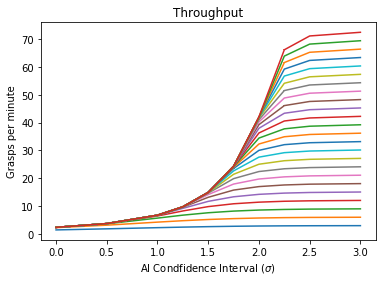

In [172]:
x = [0.0, 0.5, 1.0,1.25, 1.5,1.75, 2.0, 2.25, 2.5, 3.0]
plotThroughput(fulldata,x)

[  2.30139834e-01   3.46216872e-01   2.94450222e-01   3.55771219e-01
   3.09544970e-01   2.85650505e-01   2.10312322e-01   6.59556040e-02
   8.15264600e-03   2.54120000e-04]


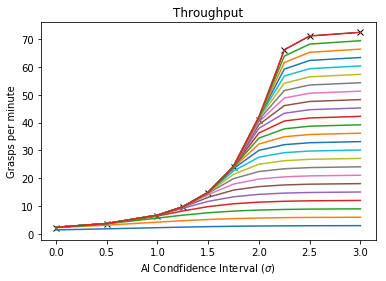

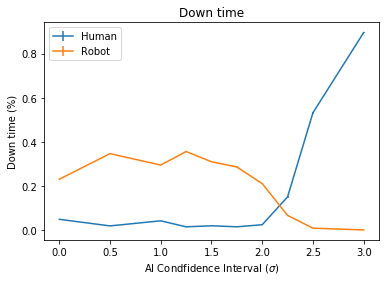

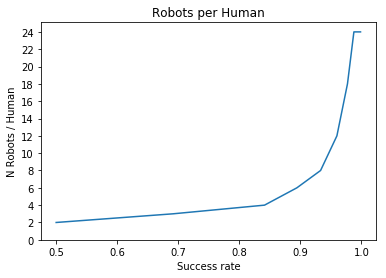

In [188]:
x    = [0.0, 0.5, 1.0, 1.25, 1.5, 1.75, 2.0, 2.25, 2.5, 3.0]
nbot = [2  ,3   , 4  , 6   , 8  , 12  , 18 , 24  , 24 , 24 ]
plotSeqThroughpout(nbot,fulldata,x)

In [236]:
from scipy.optimize import curve_fit

In [237]:
def pwr(x,a,b,c):
    return a*(x**b)+c

[  2.49868124   2.63449785   3.94253769   5.58902012   8.25347326
  12.23357626  17.84821358]
[2, 3, 4, 6, 8, 12, 18]


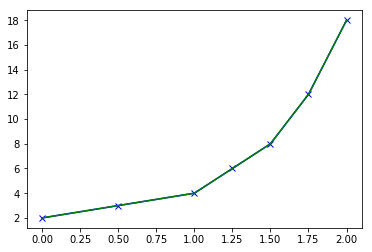

[ 1.44385645  3.41019548  2.49868124]
Predictions: 	2.5: 35	3: 64


In [241]:
y2    = [0.0, 0.5, 1.0, 1.25, 1.5, 1.75, 2.0]
nbot2 = [2  ,3   , 4  , 6   , 8  , 12  , 18 ]

popt, pcov = curve_fit(pwr,y2,nbot2)

model = pwr(y2,*popt)
print(model)
modelInt = [int(round(z)) for z in model]
print(modelInt)

plt.plot(y2,nbot2,'bx-',y2,modelInt,'g-')
plt.show()
print(popt)

print('Predictions: \t2.5: {}\t3: {}'.format(int(round(pwr(2.5,*popt))),int(round(pwr(3,*popt)))))


Testing the model on 

y2    = [0.0, 0.5, 1.0, 1.25, 1.5, 1.75, 2.0]
nbot2 = [2  ,3   , 4  , 6   , 8  , 12  , 18 ]

gives a power law of the form a*x^b+c where abc are array([ 1.44385645,  3.41019548,  2.49868124]). Rounding to the nearest integer 

THerefore we have a power law for maximal throughput

[ 1.01600455  1.01600713  1.01837817  1.03735263  1.14447133  1.60186115
  3.19694343  7.96898161]
[1, 1, 1, 1, 1, 2, 3, 8]


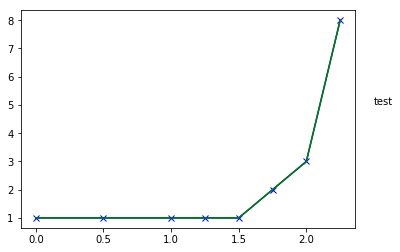

[  2.37361847e-03   9.84364557e+00   1.01600455e+00]
Predictions: 	2.5: 21	3: 119


In [243]:
y3    = [0.0, 0.5, 1.0, 1.25, 1.5, 1.75, 2.0, 2.25]
nbot3 = [1  ,1   , 1  , 1   , 1  , 2  , 3 , 8  ]

popt3, pcov3 = curve_fit(pwr,y3,nbot3)

model3 = pwr(y3,*popt3)
print(model3)
model3Int = [int(round(z)) for z in model3]
print(model3Int)

plt.plot(y3,nbot3,'bx-',y3,model3Int,'g-')

plt.text(2.5,5,"test")


plt.show()
print(popt3)

print('Predictions: \t2.5: {}\t3: {}'.format(int(round(pwr(2.5,*popt3))),int(round(pwr(3,*popt3)))))

Testing model on minimal robot down time of 
y3    = [0.0, 0.5, 1.0, 1.25, 1.5, 1.75, 2.0, 2.25]
nbot3 = [1  ,1   , 1  , 1   , 1  , 2  , 3 , 8  ]

we get a power law of the form a*x^b+c where abc are [  2.37361847e-03   9.84364557e+00   1.01600455e+00]


In [255]:
def plotThroughput(data, x=None, dolegend=False,doNote=False):
    totalbot = int(fulldata[-1,1])
    
    n_of_p = np.unique(data[:,2]).size
    
    if None == x: x=ps
    
    #x = [0.0, 0.5, 1.0, 1.5, 2.0, 2.25, 2.5, 3.0]
    
    #x = data[start:stop,2]
    #x = [0.6,1   ,1.2,1.6,1.96,2.58,3    ,4]
    #x=list(range(0,8))
    
    time = 30*24*60
    for n_robot in range(0,totalbot):
        start = n_robot*n_of_p
        stop = start+n_of_p
        y1 = data[start:stop,9]/time
        std1 = data[start:stop,10]/time
        num_bot = int(data[start,1])
        #plt.plot(x,y1,label = f'{num_bot}')
        plt.errorbar(x,y1,yerr = std1,label = f'{num_bot}')
        xmax = max(x)
        height = y1[-1]
        if doNote and not num_bot%2: plt.text(xmax,height,f'{num_bot}')
    #plt.plot(x,y2,label = f'{num_bot}')#,'g-')
    plt.title('Throughput')
    plt.xlabel(r'AI Condfidence Interval ($\sigma$)')
    plt.ylabel('Grasps per minute')
    if dolegend: plt.legend()
    plt.show()

In [258]:
def plotSeqThroughpout(nbot,data,x=None,doNote=False):
    #ps = [0.5,0.68,0.8,0.9,0.95,0.99,0.997,0.99994]
    
    
    ps = np.unique(data[:,2])
    n_of_p = np.unique(ps).size

    if None == x: x=ps
    
    totalbot = int(data[-1,1])

    time = 30*24*60
    selected = []
    for i in range(0,n_of_p):
        n_robot = nbot[i]

        point = (n_robot-1)*n_of_p+i
        selected.append( data[point] )
        #print(data[point])

    nd = np.array(selected)
    plt.figure(1)
    for n_robot in range(0,totalbot):
        start = n_robot*n_of_p
        stop = start+n_of_p
        y1 = data[start:stop,9]/time
        std1 = data[start:stop,10]/time
        num_bot = int(data[start,1])
        #plt.plot(x,y1,label = f'{num_bot}')
        plt.errorbar(x,y1,yerr = std1,label = f'{num_bot}')
        if doNote and not num_bot%2: plt.text(max(x),y1[-1],f'{num_bot}')
    plt.title('Throughput')
    plt.xlabel(r'AI Condfidence Interval ($\sigma$)')
    plt.ylabel('Grasps per minute')
    plt.plot(x,nd[:,9]/time,'kx-',label = 'Seq',linewidth=1.0)
    #plt.legend()


    plt.figure(2)
    plt.errorbar(x,nd[:,3],yerr=nd[:,4],label='Human')
    plt.errorbar(x,nd[:,5],yerr=nd[:,6],label='Robot')
    print(nd[:,5])
    plt.title('Down time')
    plt.xlabel(r'AI Condfidence Interval ($\sigma$)')
    plt.ylabel('Down time (%)')
    plt.legend()
    plt.show()

    

    plt.figure(3)
    plt.plot(ps,nbot)
    plt.title('Robots per Human')
    plt.xlabel(r'Success rate')
    plt.ylabel('N Robots / Human')
    plt.yticks(np.arange(0,totalbot+2,2))
    plt.show()

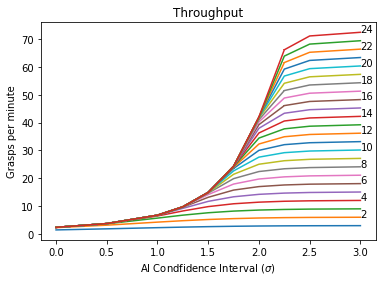

In [256]:
plotThroughput(fulldata,x,doNote=True)

[  2.30139834e-01   3.46216872e-01   2.94450222e-01   3.55771219e-01
   3.09544970e-01   2.85650505e-01   2.10312322e-01   6.59556040e-02
   8.15264600e-03   2.54120000e-04]


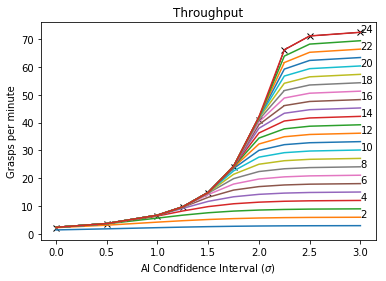

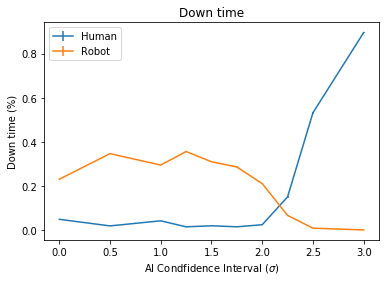

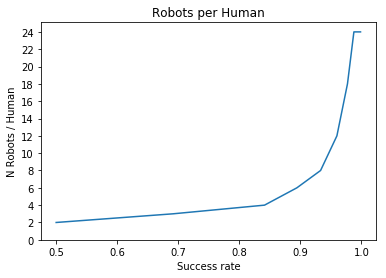

In [260]:
x    = [0.0, 0.5, 1.0, 1.25, 1.5, 1.75, 2.0, 2.25, 2.5, 3.0]
nbot = [2  ,3   , 4  , 6   , 8  , 12  , 18 , 24  , 24 , 24 ]
plotSeqThroughpout(nbot,fulldata,x,doNote=True)

In [262]:
filename = 'CDF1-29.csv'
fulldata = processDataFile(filename)
x = [0.0, 0.5, 1.0,1.25, 1.5,1.75, 2.0, 2.25, 2.5, 3.0]

['n_humans', 'n_robots', 'p_robot', 'mean Human Down', ' stdev human down', 'mean robot Down', ' stdev robot down', 'Success rate', 'stdev successrate', 'n_total', 'stdev n_total']
(290, 11)


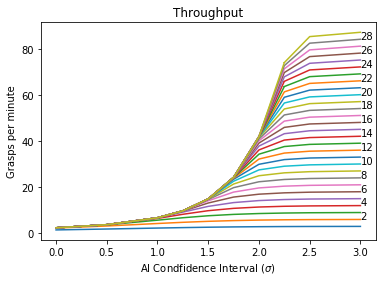

In [263]:
plotThroughput(fulldata,x,doNote=True)

In [375]:
def PlotProfitability(data,x=None,seq=None,maxbot=None,pb=False):
    TimeMultiple = 360/30
    
    
    totalbot = int(fulldata[-1,1])
    
    n_of_p = np.unique(data[:,2]).size
    
    
    PricePerPick=0.1
    HumanLabor = 40000*3
    RobotCostPerYear=70000/3.0
    
    if None == x: x=ps
    if type(None) == type(maxbot): maxbot = totalbot

    
    for n_robot in range(0,maxbot):
        start = n_robot*n_of_p
        stop = start+n_of_p

        num_bot = int(data[start,1])
        PicksPerYear = data[start:stop,9]*TimeMultiple
        
        profitability = PicksPerYear*PricePerPick-(num_bot*RobotCostPerYear+HumanLabor)
        if pb: profitability = profitability/num_bot
    
        plt.plot(x,profitability,label = f'{num_bot}')
        if num_bot%2==0: plt.text(max(x),profitability[-1],f'{num_bot}')
    
    currentAxis = plt.gca()
    currentAxis.add_patch(Rectangle((0, min(profitability)), max(x), 0-min(profitability),
                                    alpha=1, color='0.75'))
    
    plt.title('Profitability')
    plt.xlabel(r'AI Condfidence Interval ($\sigma$)')
    plt.ylabel('Annual Profit')
    if pb: 
        plt.title('Profitability per Robot')
        plt.ylabel('Annual Profit')


    
    
    if type(seq)==type([]):
        selected = []
        for i in range(0,n_of_p):
            n_robot = nbot[i]
            num_bot=n_robot
            point = (n_robot-1)*n_of_p+i
            profitability = data[point]*TimeMultiple*PricePerPick-(num_bot*RobotCostPerYear+HumanLabor)
            if pb: profitability = profitability/num_bot
            selected.append( profitability )
            #print(data[point])
        nd = np.array(selected)
        plt.plot(x,nd[:,9],'kx-',label = 'Seq',linewidth=2.0)
        stringput = ['$'+str(round(a,2)) for a in nd[:,9]]
        print(stringput)
    
    
    
    plt.show() 

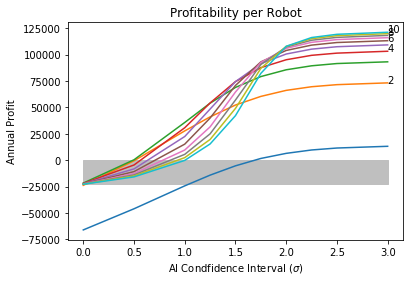

In [376]:
PlotProfitability(fulldata,x,maxbot = 10,pb=True)

['$-47735.99', '$1000.4', '$122655.99', '$239066.08', '$455220.41', '$841130.96', '$1587891.48', '$3054704.89', '$3640773.13', '$3738321.37']


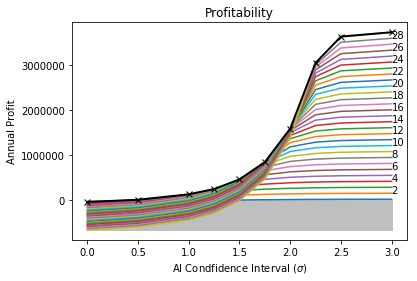

In [377]:
x    = [0.0, 0.5, 1.0, 1.25, 1.5, 1.75, 2.0, 2.25, 2.5, 3.0]
nbot = [2  ,3   , 4  , 6   , 8  , 12  , 18 , 29  , 29 , 29 ]
PlotProfitability(fulldata,x,nbot)

['$-23867.99', '$333.47', '$30664.0', '$39844.35', '$56902.55', '$70094.25', '$88216.19', '$105334.65', '$125543.9', '$128907.63']


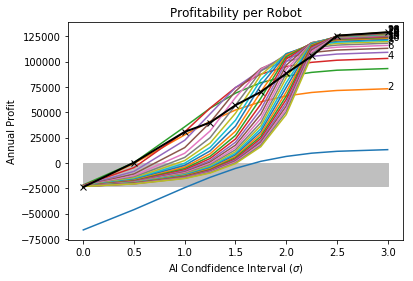

In [382]:
x    = [0.0, 0.5, 1.0, 1.25, 1.5, 1.75, 2.0, 2.25, 2.5, 3.0]
nbot = [2  ,3   , 4  , 6   , 8  , 12  , 18 , 29  , 29 , 29 ]
PlotProfitability(fulldata,x,nbot,pb=True)

['$-23867.99', '$333.47', '$35647.99', '$54120.64', '$74326.94', '$91365.45', '$107774.67', '$118325.65', '$125543.9', '$128907.63']


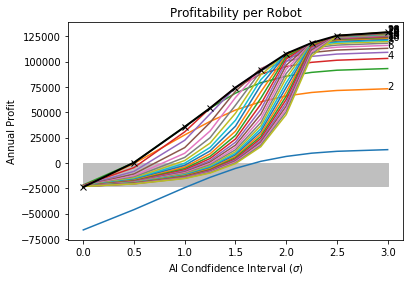

In [379]:
x    = [0.0, 0.5, 1.0, 1.25, 1.5, 1.75, 2.0, 2.25, 2.5, 3.0]
nbot = [2  ,3   , 3  , 4   , 5  , 5  , 10 , 18  , 29 , 29 ]
PlotProfitability(fulldata,x,nbot,pb=True)

['$-47735.99', '$1000.4', '$106943.96', '$216482.55', '$371634.69', '$456827.25', '$1077746.71', '$2129861.76', '$3640773.13', '$3738321.37']


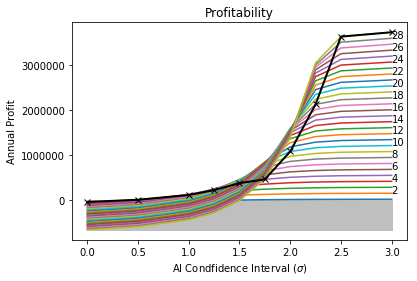

In [383]:
x    = [0.0, 0.5, 1.0, 1.25, 1.5, 1.75, 2.0, 2.25, 2.5, 3.0]
nbot = [2  ,3   , 3  , 4   , 5  , 5  , 10 , 18  , 29 , 29 ]
PlotProfitability(fulldata,x,nbot,pb=False)